# Lorenz System

In [2]:
import time
import torch
import torch_levenberg_marquardt as tlm
from bokeh.plotting import figure, output_notebook, show
from torch.utils.data import TensorDataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [ ]:
## Simulate the Lorenz System

dt = 0.01
T = 50
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = (0,1,20)

x_t = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-10),atol=10**(-11)*np.ones_like(x0))

x, y, z = x_t.T
ax.plot(x, y, z,linewidth=1, color='b')
ax.scatter(x0[0],x0[1],x0[2],color='r')
fig.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
#plt.scatter(10,10,10,color='r')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.view_init(18, -113)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [4]:
x_t.shape

(5001, 3)

In [5]:
import pandas as pd

input_df = pd.read_csv('input_data.csv', dtype='float32')
output_df = pd.read_csv('output_data.csv', dtype='float32')

In [6]:
print(output_df.dtypes)

9.87387825931768     float32
15.7331598105593     float32
-9.56745368736952    float32
dtype: object


In [7]:
input_x = torch.tensor(input_df.values)
output_x = torch.tensor(output_df.values)

SNN

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['font.size'] = 10
# Parameters
dt = 0.01
T = 8
t = np.arange(0, T + dt, dt)
beta = 8 / 3
sigma = 10
rho = 28

# Lorenz system derivatives
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Initial condition and random perturbations
np.random.seed(123)
x0 = np.array([0, 1, 20])
num_trajectories = 100
perturbation_magnitude = 1

# Prepare the plot
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
#ax.scatter(x0[0], x0[1], x0[2], color='r', label='Initial Conditions')

input = []
output = []
# Generate trajectories
for i in range(num_trajectories):
    perturbed_x0 = x0 + np.random.uniform(-perturbation_magnitude, perturbation_magnitude, size=x0.shape)
    x_t = integrate.odeint(lorenz_deriv, perturbed_x0, t, rtol=1e-12, atol=1e-12 * np.ones_like(x0))
    x, y, z = x_t.T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x[0], y[0], z[0], color='r')
    input.append(x_t[:-1])
    output.append(x_t[1:])
    if i==(num_trajectories-1):
        ax.scatter(x[0], y[0], z[0], color='r', label='Initial Conditions')
    #print(x[0], y[0], z[0])

# Add labels
#ax.set_title('Lorenz System with Random Perturbations')
ax.set_xlabel('X Axis', fontsize=15, labelpad=10)
ax.set_ylabel('Y Axis', fontsize=15, labelpad=10)
ax.set_zlabel('Z Axis', fontsize=15, labelpad=10)
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.8))
plt.tight_layout() 
ax.set_box_aspect(aspect=None, zoom=0.85)
#plt.subplots_adjust(top=0.5, bottom=0.1) 
plt.savefig("lorenz_trajectories.png", format="png", bbox_inches="tight", transparent=True, dpi=1200)
#plt.savefig("lorenz_trajectories.pdf", format="pdf", bbox_inches="tight", transparent=True)
# Display the plot interactively
plt.show()


In [ ]:
# Convert each array to a PyTorch tensor and concatenate them
input_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in input], dim=0)

# Check the shape of the resulting tensor
print("Input shape:", input_x.shape)

Input shape: torch.Size([80000, 3])


In [5]:
# Convert each array to a PyTorch tensor and concatenate them
output_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in output], dim=0)

# Check the shape of the resulting tensor
print("Output shape:", output_x.shape)

Output shape: torch.Size([80000, 3])


In [6]:
import pandas as pd

In [45]:
df_input = pd.DataFrame(input_x)
df_output = pd.DataFrame(output_x)
df_input.to_csv('input_lorenz.csv', index=False)
df_output.to_csv('output_lorenz.csv', index=False)


In [8]:
input_x[1]

tensor([ 0.4114,  0.6018, 18.9441])

In [9]:
print(output_x[0])

tensor([ 0.4114,  0.6018, 18.9441])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [8]:
class RadialBasisFunction(nn.Module):
    def __init__(self):
        super(RadialBasisFunction, self).__init__()

    def forward(self, x):
        return torch.exp(-torch.pow(x, 2))


In [9]:
import torch_levenberg_marquardt as tlm

In [6]:
# Set PyTorch to use high precision for matrix multiplication
torch.set_float32_matmul_precision('high')

# Detect CUDA device for acceleration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(f'Using device: {device}')
device = 'cpu'

In [11]:
# # Neural Network Model
# class SimpleNN(nn.Module):
#     def __init__(self):
#         super(SimpleNN, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(3, 30),
#             #nn.ReLU(),
#             nn.LeakyReLU(negative_slope=0.02),
#             #RadialBasisFunction(),
#             nn.Linear(30, 30),
#             #nn.Sigmoid(),
#             nn.LeakyReLU(negative_slope=0.02),
#             #nn.Linear(30, 30),
#             #nn.LeakyReLU(negative_slope=0.02),
#             #nn.Sigmoid(),
#             nn.Linear(30, 3)
#         )

#     def forward(self, x):
#         return self.fc(x)

In [7]:
# %%
# Define a function to create the neural network model
def create_model() -> torch.nn.Module:
    return torch.nn.Sequential(
        torch.nn.Linear(3, 30),
        torch.nn.Tanh(),
        torch.nn.Linear(30, 30),
        torch.nn.Sigmoid(),
        torch.nn.Linear(30, 30),
        torch.nn.ReLU(),
        torch.nn.Linear(30, 3),
    ).to(device)

In [12]:
# # Custom Dataset for sequential data
# class TimeSeriesDataset(Dataset):
#     def __init__(self, input, output):
#         # Generate (x, y) pairs from sequential data
#         self.x = input
#         self.y = output

#         # Shuffle the pairs
#         #indices = np.random.permutation(len(self.x))
#         #self.x = self.x[indices]
#         #self.y = self.y[indices]

#     def __len__(self):
#         return len(self.x)

#     def __getitem__(self, index):
#         return self.x[index], self.y[index]

In [13]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Define dataset
dataset = TensorDataset(input_x, output_x)

# Split sizes: 80% training, 20% validation
train_size = int(0.8 * len(dataset))  # 80% of 80,000
val_size = len(dataset) - train_size  # Remaining 20%

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [14]:
# Create dataset and dataloader
#train_dataset = TensorDataset(input_x, output_x)
train_loader = tlm.utils.FastDataLoader(
    train_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

val_loader = tlm.utils.FastDataLoader(
    val_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

In [15]:
# # # Prepare data
# # def prepare_data(input, output):
# #     dataset = TimeSeriesDataset(input, output)
# #     return DataLoader(dataset, batch_size=32, shuffle=True)

# # Training function
# def train_model(model, dataloader, criterion, optimizer, epochs=20):
#     model.train()
#     for epoch in range(epochs):
#         total_loss = 0
#         for x, y in dataloader:
#             x, y = x.float(), y.float()
#             optimizer.zero_grad()
#             outputs = model(x)
#             loss = criterion(outputs, y)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()
#         print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataloader):.8f}")


In [ ]:
# Example usage
if __name__ == "__main__":
    # Simulated data for demonstration (replace with your actual data)
    data = x_t  # Random data: 50,001 samples of (x, y, z)

    # Prepare dataset and dataloader
    #dataloader = prepare_data(input_x, output_x)

    # Initialize model, criterion, and optimizer
    model = create_model()

    module_lm = tlm.training.LevenbergMarquardtModule(
    model=model,
    loss_fn=tlm.loss.MSELoss(),
    learning_rate=1.0,
    attempts_per_step=20,
    solve_method='qr',
    )

    loss_all, val_loss_all = tlm.utils.fit(
    module_lm,
    train_loader,
    epochs=20,
    overwrite_progress_bar = False,
    val_loader=val_loader,
    )

    #criterion = nn.MSELoss()  # Mean Squared Error for regression tasks
    #optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    #train_model(model, dataloader, criterion, optimizer, epochs=1000)

    # Save the model
    #torch.save(model.state_dict(), "time_series_model.pth")


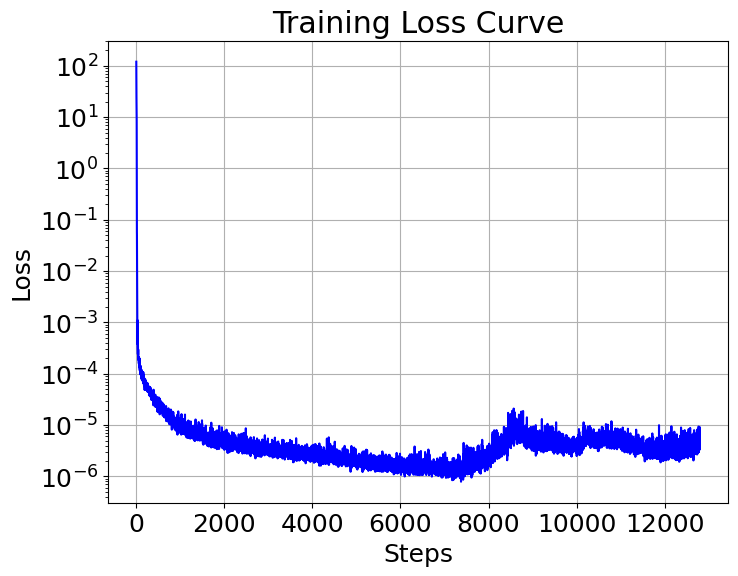

In [22]:
# Plot the loss curve
loss_all_cpu = [loss_item.cpu().numpy() for loss_item in loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

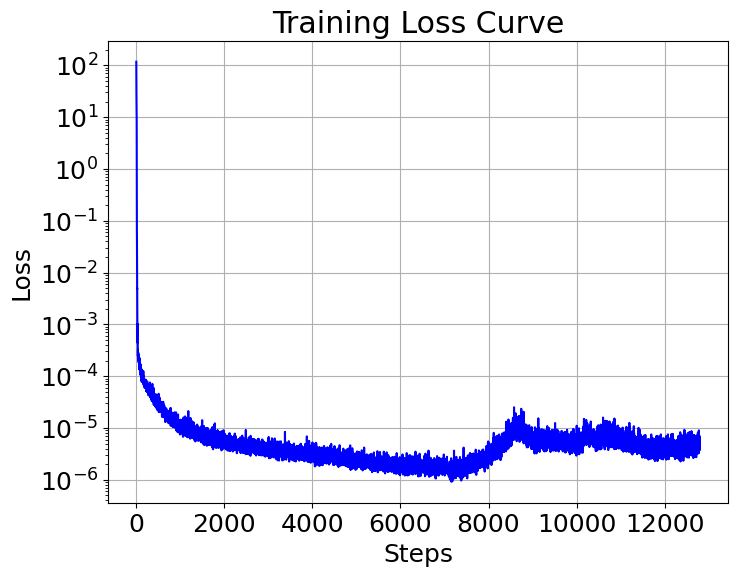

In [20]:

# Plot the loss curve
loss_all_cpu = [loss_item for loss_item in val_loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

In [31]:
import torch

# Define a function to save the trained model
def save_model(model: torch.nn.Module, file_path: str):
    # Save the model's state dictionary
    torch.save(model.state_dict(), file_path)

# Save the trained model to a file
save_model(model, "ANN_model_new.pth")
print("Model saved to 'trained_model.pth'")


Model saved to 'trained_model.pth'


In [23]:
import pandas as pd

# Create a DataFrame for the loss values
loss_df = pd.DataFrame({
    "Step": range(1, len(loss_all_cpu) + 1),
    "Loss": loss_all_cpu
})

# Save the DataFrame to a CSV file
loss_df.to_csv("ANN_loss_curve_new_train.csv", index=False)
print("Loss curve saved to 'loss_curve.csv'")


Loss curve saved to 'loss_curve.csv'


In [24]:
# Calculate the total number of weights (trainable parameters)
total_weights = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total number of weights: {total_weights}")

Total number of weights: 2073


In [11]:
# Load the saved model
def load_model(file_path: str, device: torch.device) -> torch.nn.Module:
    model = create_model().to(device)  # Initialize the model
    model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state dictionary
    model.eval()  # Set the model to evaluation mode
    return model

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "ANN_model.pth"  # Path to your saved model
loaded_model = load_model(model_path, "cpu")

print("Model successfully loaded!")

Model successfully loaded!


/tmp/ipykernel_779/1160779535.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state diction

In [25]:
loaded_model = model

In [ ]:
#Set model to evaluation mode
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [6, 6]
#model = loaded_model.to("cpu")
loaded_model.to("cpu")
loaded_model.eval()

# Generate a trajectory using the model
def generate_trajectory(initial_condition, num_steps):
    trajectory = []
    current_state = torch.tensor(initial_condition, dtype=torch.float32)  # Convert initial condition to tensor

    for _ in range(num_steps):
        # Predict the next state
        next_state = loaded_model(current_state)

        # Append the predicted state to the trajectory
        trajectory.append(next_state.detach().numpy())

        # Use the output of the model as input for the next step
        current_state = next_state

    return np.array(trajectory)

# Example initial condition (x0, y0, z0)

initial_condition = x_t[4000]

# Number of steps for the trajectory
num_steps = 600

# Generate the trajectory
trajectory = generate_trajectory(initial_condition, num_steps)

# Plot the trajectory
x, y, z = trajectory.T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Generated Trajectory by FFNN")

x_a, y_a, z_a = x_t[4000:4600].T
ax.plot(x_a, y_a, z_a,linewidth=1, label="Actual Trajectory")


# Highlight the starting points with red circles
ax.scatter(x[0], y[0], z[0], color='red', s=100, marker='o')  # Starting point of generated trajectory
ax.scatter(x_a[1], y_a[1], z_a[1], color='red', s=100, label="Initial Condition", marker='o')  # Starting point of actual trajectory


ax.set_xlabel('X Axis', fontsize=15, labelpad=10)
ax.set_ylabel('Y Axis', fontsize=15, labelpad=10)
ax.set_zlabel('Z Axis', fontsize=15, labelpad=10)
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout() 
ax.set_box_aspect(aspect=None, zoom=0.85)
#ax.view_init(elev=0, azim=0) 
plt.savefig("predict_ANN_3D.pdf", format="pdf", bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
# Predict on Test Data
#x_pred = model.simulate(x_test[0], t_test)
plt.rcParams['font.size'] = 15
x_pred = trajectory
x_test = x_t[4000:4600]
t_test = t[4000:4600]
# Calculate Prediction Error
mse = np.mean((x_pred - x_test) ** 2, axis=0)
print(f"Mean Squared Error for each variable (x, y, z): {mse}")
print(f"Total Mean Squared Error: {np.mean(mse)}")

# Plot Results
fig = plt.figure(figsize=(12, 6))
time = np.arange(x_test.shape[0]) * 0.01

# Plot x
plt.subplot(3, 1, 1)
plt.plot(time, x_test[:, 0], label="Ground Truth", color="blue")
plt.plot(time, x_pred[:, 0], label="Predicted", linestyle="--", color="red")
plt.ylabel("x")
plt.legend()

# Plot y
plt.subplot(3, 1, 2)
plt.plot(time, x_test[:, 1], label="True y", color="blue")
plt.plot(time, x_pred[:, 1], label="Predicted y", linestyle="--", color="red")
plt.ylabel("y")

# Plot z
plt.subplot(3, 1, 3)
plt.plot(time, x_test[:, 2], label="True z", color="blue")
plt.plot(time, x_pred[:, 2], label="Predicted z", linestyle="--", color="red")
plt.ylabel("z")
plt.xlabel("Time")
#plt.legend()
# Save the plot to a PDF file
output_file = "predicted_ANN.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
#plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming x_pred and x_test are already defined as in your code.

# Calculate Prediction Error
error = (x_pred - x_test) ** 2  # Squared error for each variable (x, y, z)
mean_error_per_timestep = np.mean(error, axis=1)  # Mean error across x, y, z for each time step
cumulative_mean_error = np.cumsum(mean_error_per_timestep) / np.arange(1, len(mean_error_per_timestep) + 1)  # Cumulative mean error

# Save to CSV
output_csv_file = "cumulative_mean_error_ANN.csv"
pd.DataFrame({"Time Step": np.arange(len(cumulative_mean_error)), "Cumulative Mean Error": cumulative_mean_error}).to_csv(output_csv_file, index=False)

# Plot Mean Error Variation
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean_error, label="Cumulative Mean Error", color="blue")
plt.title("Cumulative Mean Error Variation")
plt.xlabel("Time")
plt.ylabel("Mean Error")
plt.legend()
plt.grid()

# # Save the plot to a PDF file
# output_pdf_file = "cumulative_mean_error_single_curve.pdf"
# plt.savefig(output_pdf_file, format="pdf", bbox_inches="tight")
# plt.tight_layout()
# plt.show()

# print(f"Cumulative mean error saved to {output_csv_file}")
